In [197]:
# import necessary package
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [198]:
# import data
PATH = "./data"
data = pd.read_csv(os.path.join(PATH, 'train.csv'))

## 第1步：查看data数据表的特点

In [199]:
# view the first five eitems and last five items
print(data.head())
print(data.tail())

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
              date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82


In [200]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [201]:
print(data['store'].value_counts())
print(data['item'].value_counts())

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64
50    18260
13    18260
23    18260
22    18260
21    18260
20    18260
19    18260
18    18260
17    18260
16    18260
15    18260
14    18260
12    18260
49    18260
11    18260
10    18260
9     18260
8     18260
7     18260
6     18260
5     18260
4     18260
3     18260
2     18260
24    18260
25    18260
26    18260
27    18260
48    18260
47    18260
46    18260
45    18260
44    18260
43    18260
42    18260
41    18260
40    18260
39    18260
38    18260
37    18260
36    18260
35    18260
34    18260
33    18260
32    18260
31    18260
30    18260
29    18260
28    18260
1     18260
Name: item, dtype: int64


In [202]:
# data statistic information
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


## 第2步：商店商品随时间的销售量曲线图

### 图1：“所有商店所有商品的销售量总和”随时间的销售量曲线图

In [203]:
data['date'] = pd.to_datetime(data['date'])

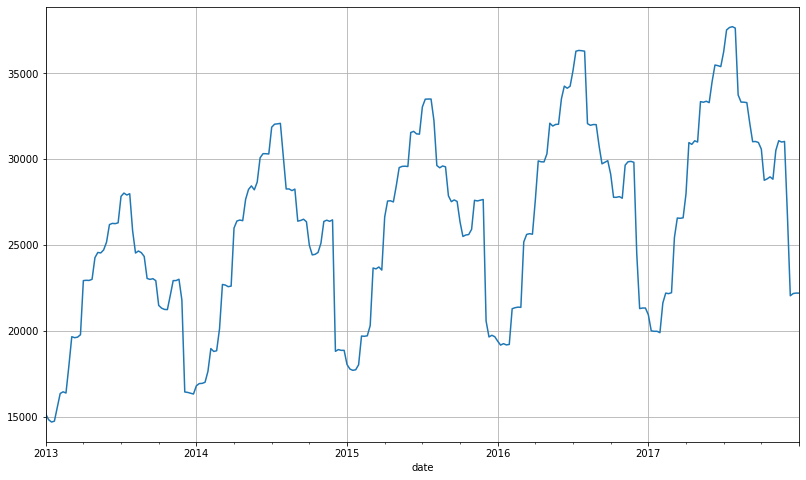

In [204]:
data_1 = data.groupby('date').sum()
data_1['sales'].resample('W').mean().plot(figsize=(13.5, 8), grid=True)

*               分析结论1：一年的销售量曲线呈凸状，年中高，年初和年末低。
*             分析结论2：整年销售量呈上升趋势，表现在同月份的销售量呈上升趋势

### 图2：四条“商店，商品”随时间的销售量曲线图

Text(0.5, 0, 'Date')

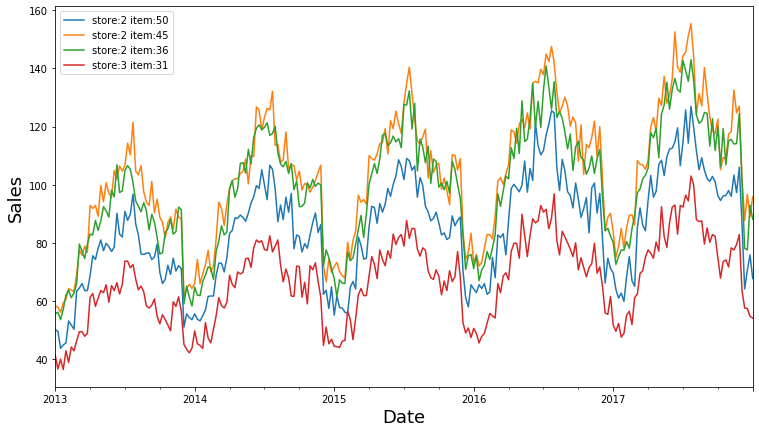

In [205]:
data_2 = data.groupby(['store', 'item', 'date']).mean()

fig, ax = plt.subplots(figsize=(12.5, 7))
legends = []
for i in range(4):
    index = np.random.randint(0, 250)
    store = index // 50 + 1
    item = index % 50 + 1
    data_2.loc[store, item].resample('W').mean().plot(ax=ax)
    legends.append(f'store:{store} item:{item}')
    
ax.legend(legends)
ax.set_ylabel('Sales', fontsize=18)
ax.set_xlabel('Date', fontsize=18)

* 分析结论3：不同商店的不同商品的销售大多遵从相同的年内和年间规律

### 图3：四条“商店内所有商品”随时间的销售量曲线图

Text(0.5, 0, 'Date')

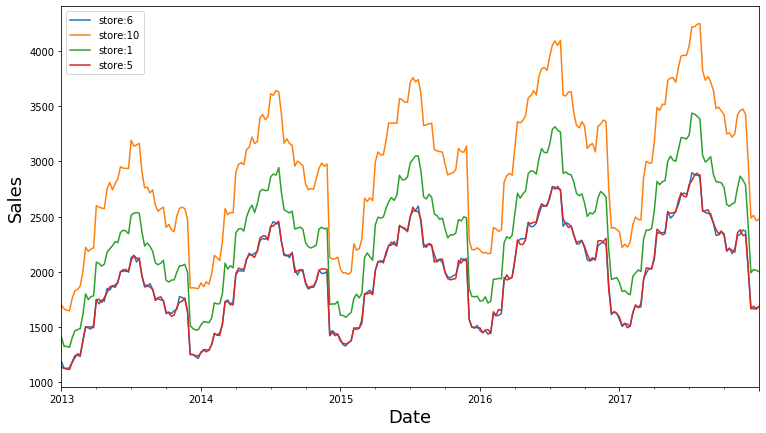

In [206]:
data_3 = data.groupby(['store', 'date']).sum()

fig, ax = plt.subplots(figsize=(12.5, 7))
legends = []
for i in range(4):
    store = np.random.randint(1, 11)
    data_3.loc[store]['sales'].resample('W').mean().plot(ax=ax)
    legends.append(f'store:{store}')
ax.legend(legends)
ax.set_ylabel('Sales', fontsize=18)
ax.set_xlabel('Date', fontsize=18)

* 分析结论4：不同商店的销售量有差异，但销售量总体上与也遵循相同的年内和年间变化

### 图4：四条“商品在所有商店中的总和”随时间的销售量曲线图

Text(0.5, 0, 'Date')

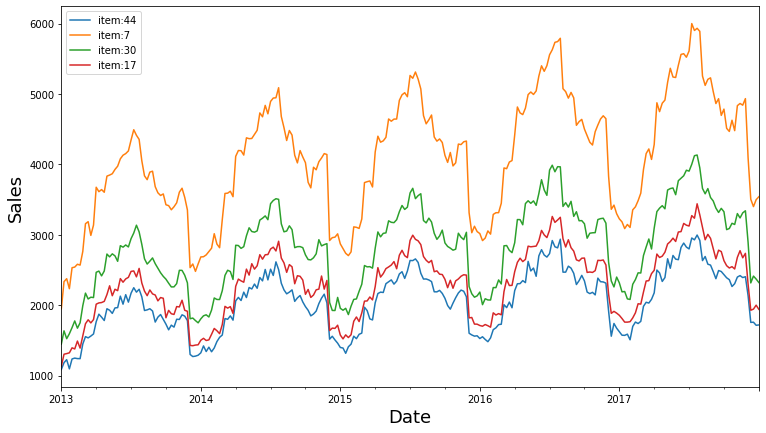

In [207]:
data_4 = data.groupby(['item', 'date']).sum()

fig, ax = plt.subplots(figsize=(12.5, 7))
legends = []
for i in range(4):
    item = np.random.randint(1, 51)
    data_4.loc[item]['sales'].resample('W').sum().plot(ax=ax)
    legends.append(f'item:{item}')

ax.legend(legends)
ax.set_ylabel('Sales', fontsize=18)
ax.set_xlabel('Date', fontsize=18)

* 分析结论5：不同商品的销售量情况不同，但销售量整体上遵循相同的年内和年间变化